In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c pytorch -c tensorcomp tensor_comprehensions

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

--2021-05-29 03:44:15--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2021-05-29 03:44:15--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   154MB/s    in 3.6s    

2021-05-29 03:44:18 (155 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install argparse

In [20]:
from zipfile import ZipFile
file_name = "image.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


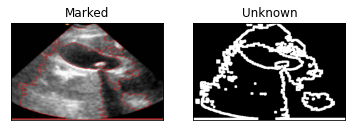

In [23]:
#%%     #this line is for VSCode editor only
import cv2
#from skimage.measure import compare_ssim
import argparse
#import imutils
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

img = cv2.imread(r'/content/image/images/image2.JPG',0)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(thresh,'gray')
plt.title('Thresh_Binary_INV+cv2.Thresh_OTSU')
plt.xticks([]),plt.yticks([])

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(121),plt.imshow(sure_fg,'gray')
plt.title('Sure')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(unknown,'gray')
plt.title('Unknown')
plt.xticks([]),plt.yticks([])

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


plt.subplot(121),plt.imshow(markers,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])

img = cv2.imread(r'/content/image/images/image2.JPG',1)
img = cv2.medianBlur(img,5)
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


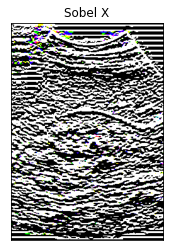

In [25]:
import cv2
#from skimage.measure import compare_ssim
import argparse
import imutils
import numpy as np
import matplotlib.pyplot as plt
#change the path as per you configuration
img = cv2.imread(r'/content/image/Images_Used/image1.jpg',1)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
#sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(111), plt.imshow(sobely, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


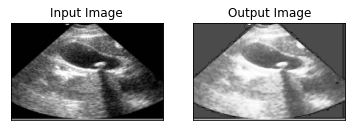

In [26]:
#%%
import cv2
import argparse
import imutils
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'/content/image/Images_Used/image2.JPG', 0)

# **** check by changing the value 5 to any other odd number ****
dst = cv2.medianBlur(img, 5)

# Calculate the Laplacian
lap = cv2.Laplacian(dst,cv2.CV_64F)

# Calculate the sharpened image
# *****check this line if it is necessary******
sharp = dst - 0.3*lap

sharp = np.uint8(cv2.normalize(sharp, None, 0 , 255, cv2.NORM_MINMAX))
equ = cv2.equalizeHist(sharp)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equ, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

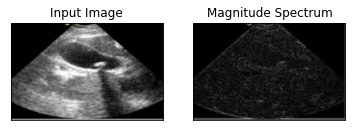

In [27]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

ddepth = cv.CV_16S
kernel_size = 3
# [variables]
# [load]
src = cv.imread(r'/content/image/Images_Used/image2.JPG', cv.IMREAD_COLOR) # Load an image
# Check if image is loaded fine
# [load]
# [reduce_noise]
# Remove noise by blurring with a Gaussian filter
src = cv.GaussianBlur(src, (3, 3), 0)
# [reduce_noise]
# [convert_to_gray]
# Convert the image to grayscale
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# [convert_to_gray]
# Create Window
# [laplacian]
# Apply Laplace function
dst = cv.Laplacian(src_gray, ddepth, kernel_size)
# [laplacian]
# [convert]
# converting back to uint8
abs_dst = cv.convertScaleAbs(dst)
# [convert]
# [display]
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(abs_dst, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

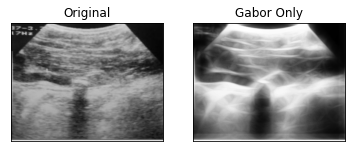

In [28]:
#%%     #this line is for VSCode editor only
import cv2
#from skimage.measure import compare_ssim
import argparse
#import imutils
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
#change the path as per you configuration

img = cv2.imread(r'/content/image/Images_Used/image3.JPG',0)


#sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
#sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)

def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize': (ksize, ksize), 'sigma': 2.5, 'theta': theta, 'lambd': 15.0,
                  'gamma': 0.02, 'psi': 0, 'ktype': cv2.CV_32F}
        
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern, params))
    return filters


def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern, params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum


#main
filters = build_filters()
p = process(img, filters)

equ = cv2.equalizeHist(p)

plt.figure(1)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(equ, cmap='gray')
plt.title('Gabor Only'),plt.xticks([]),plt.yticks([])
plt.show()

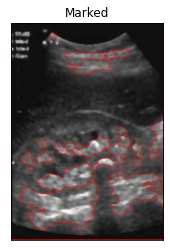

In [30]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

s = r'/content/image/Images_Used'
image_no = '/image1.jpg'
s = s + image_no

img = cv2.imread(s,0)

def build_filters():
    #returns a list of kernels in several orientations
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize': (ksize, ksize), 'sigma': 0.0225, 'theta': theta, 'lambd': 15.0,
                  'gamma': 0.01, 'psi': 0, 'ktype': cv2.CV_32F}
        
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern, params))
    return filters


def process(img, filters):
    #returns the img filtered by the filter list
    accum = np.zeros_like(img)
    for kern, params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

def Histeq(img):
    equ = cv2.equalizeHist(img)
    return equ

def GaborFilter(img):
    filters = build_filters()
    p = process(img, filters)
    return p

def Laplacian(img,par):  
    lap = cv2.Laplacian(img,cv2.CV_64F)
    sharp = img - par*lap
    sharp = np.uint8(cv2.normalize(sharp, None, 0 , 255, cv2.NORM_MINMAX))
    return sharp

def Watershed(img):
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.23*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    img2 = cv2.imread(s,1)
    img2 = cv2.medianBlur(img2,5)
    markers = cv2.watershed(img2,markers)
    img2[markers == -1] = [255,0,0]

    return img2

if image_no=='/image1.jpg':
    img3 = Laplacian(img,0.239)
    
elif image_no=='/image2.jpg':
    img3 = GaborFilter(img)
    img3 = Histeq(img3)

elif image_no=='/image4.jpg':
    img3 = GaborFilter(img)

img3 = Watershed(img)

plt.imshow(img3,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])
plt.show()